In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [30]:
sp500 = pd.read_csv('sp500_historical.csv.gz', sep=',')
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500.set_index('Date', inplace=True)
sp500.tail(5)

,open,high,low,close,volume,adj_close
Date,,,,,,
2017-08-23,2444.879883,2448.909912,2441.419922,2444.040039,2444.040039,2.785290e+09
2017-08-24,2447.909912,2450.389893,2436.189941,2438.969971,2438.969971,2.846590e+09
2017-08-25,2444.719971,2453.959961,2442.219971,2443.050049,2443.050049,2.588780e+09
2017-08-28,2447.350098,2449.120117,2439.030029,2444.239990,2444.239990,2.677700e+09
2017-08-29,2431.939941,2449.189941,2428.199951,2446.300049,2446.300049,2.737580e+09


## Going to calendar days

In [25]:
# Create a calendar index
calendar_idx = pd.date_range(start=sp500.index[0], end=sp500.index[-1], freq='D')
# Create calendar day closes, non trading days are NaN
cd_closes = pd.DataFrame(sp500[["close"]], index=calendar_idx)
# Fill NaN with previous close
cd_closes.fillna(method="ffill", inplace=True)

## Creating days and months columns

In [26]:
# Create month and day of month
cd_closes["month"] = cd_closes.index.month
cd_closes["day"] = cd_closes.index.day

## Normalizing by the 1st day of the month

In [27]:
# Create column containing the close of the first day of each month
cd_closes.loc[cd_closes["day"] == 1, "first_day"] = cd_closes["close"]
cd_closes["first_day"].fillna(method="ffill", inplace=True)
# If NaN remains in first_day columns this means a month is not complete
# So we drop it
cd_closes.dropna(inplace=True)
# Now create a normalized close
cd_closes["normed_close"] = cd_closes.close / cd_closes.first_day - 1

## Grouping per month and day 

In [28]:
monthly_seasonals = cd_closes[["month", "day", "normed_close"]].groupby(by=["month", "day"]).mean()

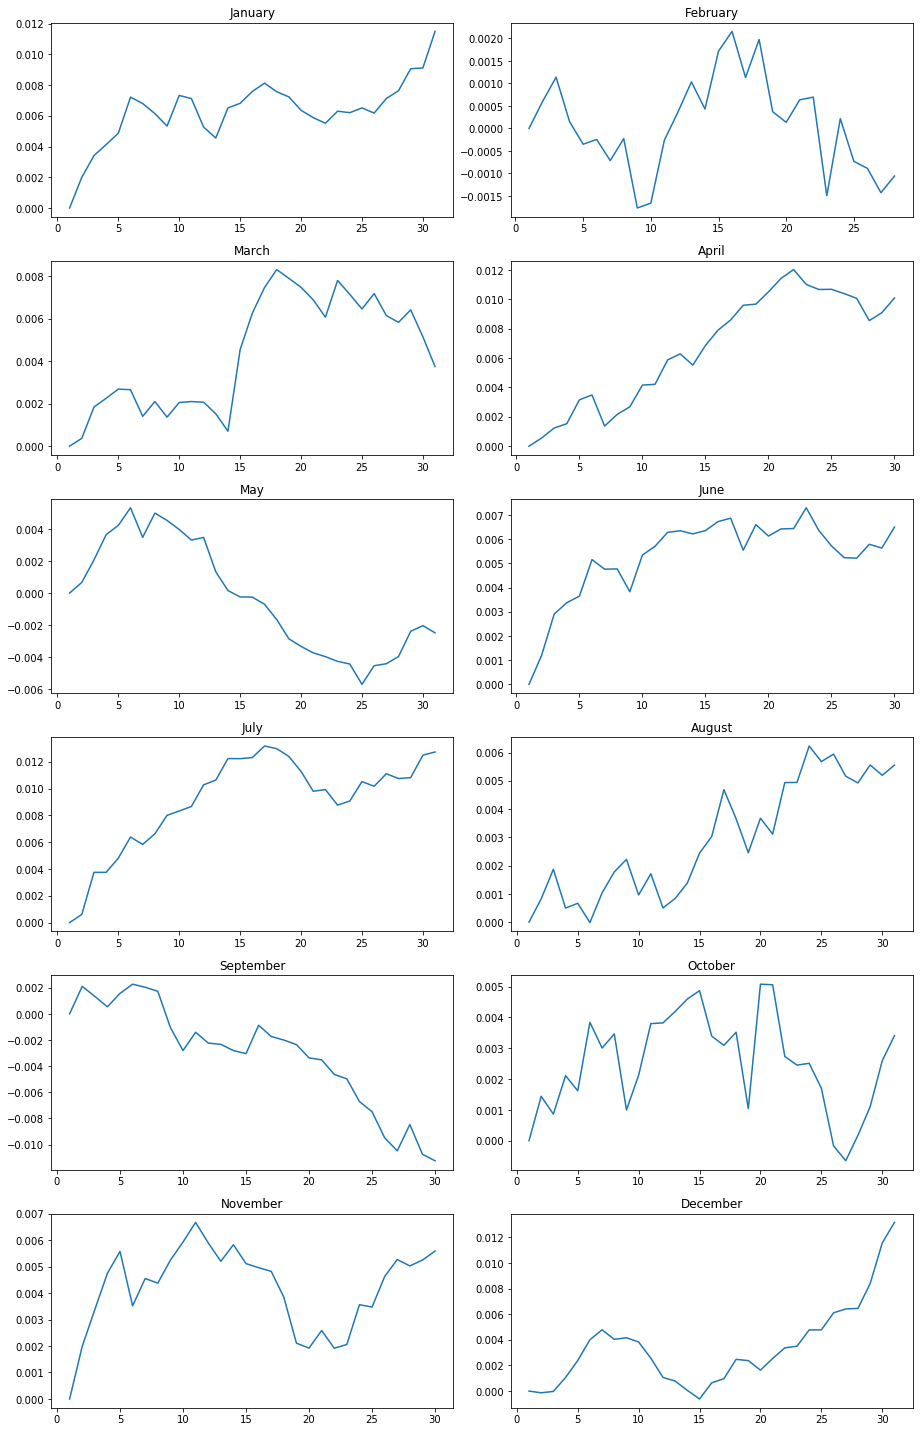

In [33]:
gs = gridspec.GridSpec(6, 2)
plt.figure(figsize=(13,20))
months = ['January', "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
for i in range(12):
    ax = plt.subplot(gs[int(i/2), i % 2])
    ax.set_title(months[i])
    if i == 1: # February usually has 28 days...
        ax.plot(monthly_seasonals.loc[i+1][:28])
    else:
        ax.plot(monthly_seasonals.loc[i+1])
plt.tight_layout()